In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

C:\Users\preet\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
df = pd.read_csv('IMDb Movies India.csv', encoding='latin1')
original = df.copy()
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [193]:
# view data
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


## 1.  Summary of Data
This is the dataset of IMDB Indian Movies. There are 10 columns and 15509 rows in this dataset... 

In [194]:
df.shape

(15509, 10)

## 2.  Columns Description
- **Name:** Name of Movie
- **Year:** Year of release of each movie
- **Duration:** Length/Duration of movies
- **Genre:** Genre of Movie. e.g. Drama, Comedy, Romance
- **Rating:** Imdb Ratings
- **Director:** Director name 
- **Actor 1:** Lead Actor of the film
- **Actor 2:** Second Lead Actor Name
- **Actor 3:** Third / Support Actor name

## 3. Additional Information

## 4. Issues with the Dataset

1. Dirty Data
    - Duplicate Values in Name Columns `Validate`
    - Missing Values in the all Columns `Completeness`
    - special charachter in the starting of the name column `Accuracy`
    - remove comma from votes columns `Accuracy`
    - bracket in the year column `Accuracy`
    - In duration table there is alpha numeric data

2. Messy Data
    - Posibily of spiliting Genre list Column into differnet Genres

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [196]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [197]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [198]:
df[df['Name'] == 'A Ballad of Maladies']

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
135,A Ballad of Maladies,(2016),86 min,"Documentary, Music",NaN,NaN,Sarvnik Kaur,Tushar Madhav,NaN,NaN
136,A Ballad of Maladies,(2016),86 min,"Documentary, History, Music",NaN,NaN,Sarvnik Kaur,Tushar Madhav,NaN,NaN


In [199]:
df.drop(['Actor 2', 'Actor 3'], axis=1, inplace=True)
# here is the confusion in row 953 and 954 both movies seems duplicated

In [200]:
# df[df.duplicated(subset=['Name','Year','Actor 1'])]['Name'].tolist()

In [201]:
# dup_mov = ['A Ballad of Maladies',
#  'Amrit',
#  'Arab Ka Sona - Abu Kaalia',
#  'Balidan',
#  'First Time - Pehli Baar',
#  'Kathor',
#  'Musafir',
#  'Natth',
#  'Sant Dnyaneshwar',
#  'Shivani',
#  'Slumdog Karodpati']

# for mov in dup_mov:
#     print(df[df['Name'] == mov])
#     print("--------------------------------------------------------------------------------")

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
dtypes: float64(1), object(7)
memory usage: 969.4+ KB


In [203]:
# for now removing those rows who have more the 7 percent of null values
# Creating a function of calculating missing values percentage

def missing_values_with_percent():
    return pd.DataFrame({
    'Missing Values': df.isna().sum().values,
    'Percentage': ((df.isna().sum()/len(df)) * 100).apply(lambda x: f'{x:.2f}%')
}, index=df.columns)

missing_values_with_percent()

,Missing Values,Percentage
Name,0,0.00%
Year,528,3.40%
Duration,8269,53.32%
Genre,1877,12.10%
Rating,7590,48.94%
Votes,7589,48.93%
Director,525,3.39%
Actor 1,1617,10.43%


In [204]:
df.dropna(subset=['Duration'],inplace=True)

In [205]:
missing_values_with_percent()

,Missing Values,Percentage
Name,0,0.00%
Year,125,1.73%
Duration,0,0.00%
Genre,187,2.58%
Rating,1389,19.19%
Votes,1389,19.19%
Director,14,0.19%
Actor 1,264,3.65%


In [206]:
df = df[(df.isnull().sum(axis=1).sort_values(ascending=False) <= 5)]

C:\Users\preet\AppData\Local\Temp\ipykernel_11856\2431765847.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[(df.isnull().sum(axis=1).sort_values(ascending=False) <= 5)]


In [207]:
missing_values_with_percent()

,Missing Values,Percentage
Name,0,0.00%
Year,125,1.73%
Duration,0,0.00%
Genre,187,2.58%
Rating,1389,19.19%
Votes,1389,19.19%
Director,14,0.19%
Actor 1,264,3.65%


In [338]:
df.dropna(subset=['Rating','Votes'],inplace=True)

In [209]:
missing_values_with_percent()

,Missing Values,Percentage
Name,0,0.00%
Year,0,0.00%
Duration,0,0.00%
Genre,31,0.53%
Rating,0,0.00%
Votes,0,0.00%
Director,1,0.02%
Actor 1,75,1.28%


In [210]:
# fill genre column with drama
df.groupby('Genre').Genre.count().sort_values(ascending=False)

Genre
Drama                            870
Drama, Romance                   334
Action, Crime, Drama             329
Action, Drama                    207
Comedy, Drama                    206
                                ... 
Documentary, Adventure, Crime      1
Documentary, Adventure, Music      1
Documentary, Biography, Music      1
Documentary, Comedy, Drama         1
Crime, Musical, Mystery            1
Name: Genre, Length: 393, dtype: int64

In [211]:
df['Genre'].fillna('Drama',inplace=True)

In [212]:
missing_values_with_percent()

,Missing Values,Percentage
Name,0,0.00%
Year,0,0.00%
Duration,0,0.00%
Genre,0,0.00%
Rating,0,0.00%
Votes,0,0.00%
Director,1,0.02%
Actor 1,75,1.28%


In [213]:
df.Director.describe()

count             5850
unique            2549
top       David Dhawan
freq                41
Name: Director, dtype: object

In [214]:
df.groupby('Director').Director.count().sort_values(ascending=False)

Director
David Dhawan            41
Mahesh Bhatt            39
Ram Gopal Varma         34
Shakti Samanta          34
Hrishikesh Mukherjee    33
                        ..
Kathir                   1
Kashmira Shah            1
Kashinath                1
Kasam Ali                1
Zunaid Memon             1
Name: Director, Length: 2549, dtype: int64

In [215]:
df['Director'].fillna('David Dhawan',inplace=True)

In [216]:
missing_values_with_percent()

,Missing Values,Percentage
Name,0,0.00%
Year,0,0.00%
Duration,0,0.00%
Genre,0,0.00%
Rating,0,0.00%
Votes,0,0.00%
Director,0,0.00%
Actor 1,75,1.28%


In [217]:
df['Actor 1'].describe()

count                 5776
unique                2046
top       Amitabh Bachchan
freq                   104
Name: Actor 1, dtype: object

In [218]:
df['Actor 1'].fillna('Amitabh Bachchan', inplace=True)

In [219]:
missing_values_with_percent()

,Missing Values,Percentage
Name,0,0.00%
Year,0,0.00%
Duration,0,0.00%
Genre,0,0.00%
Rating,0,0.00%
Votes,0,0.00%
Director,0,0.00%
Actor 1,0,0.00%


In [220]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave


In [221]:
df['Year'] = df['Year'].str.replace(r'[()]', '', regex=True)

In [222]:
df['Duration'] = df['Duration'].str.replace(r' min', '', regex=True)

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5851 entries, 1 to 15508
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5851 non-null   object 
 1   Year      5851 non-null   object 
 2   Duration  5851 non-null   object 
 3   Genre     5851 non-null   object 
 4   Rating    5851 non-null   float64
 5   Votes     5851 non-null   object 
 6   Director  5851 non-null   object 
 7   Actor 1   5851 non-null   object 
dtypes: float64(1), object(7)
memory usage: 411.4+ KB


## Visualization

Text(0.5, 1.0, 'Number of Movies Per Year')

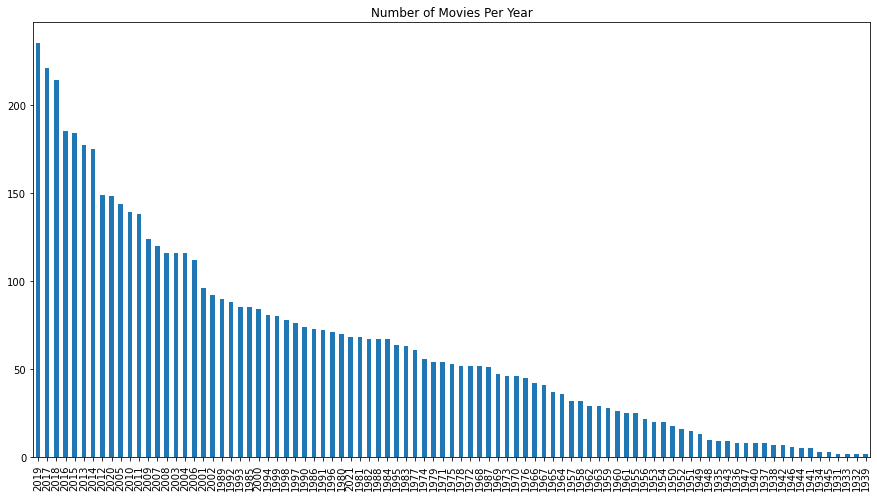

In [312]:
plt.figure(figsize=(15,8))
df['Year'].value_counts().plot(kind='bar')
plt.title('Number of Movies Per Year')

<AxesSubplot:>

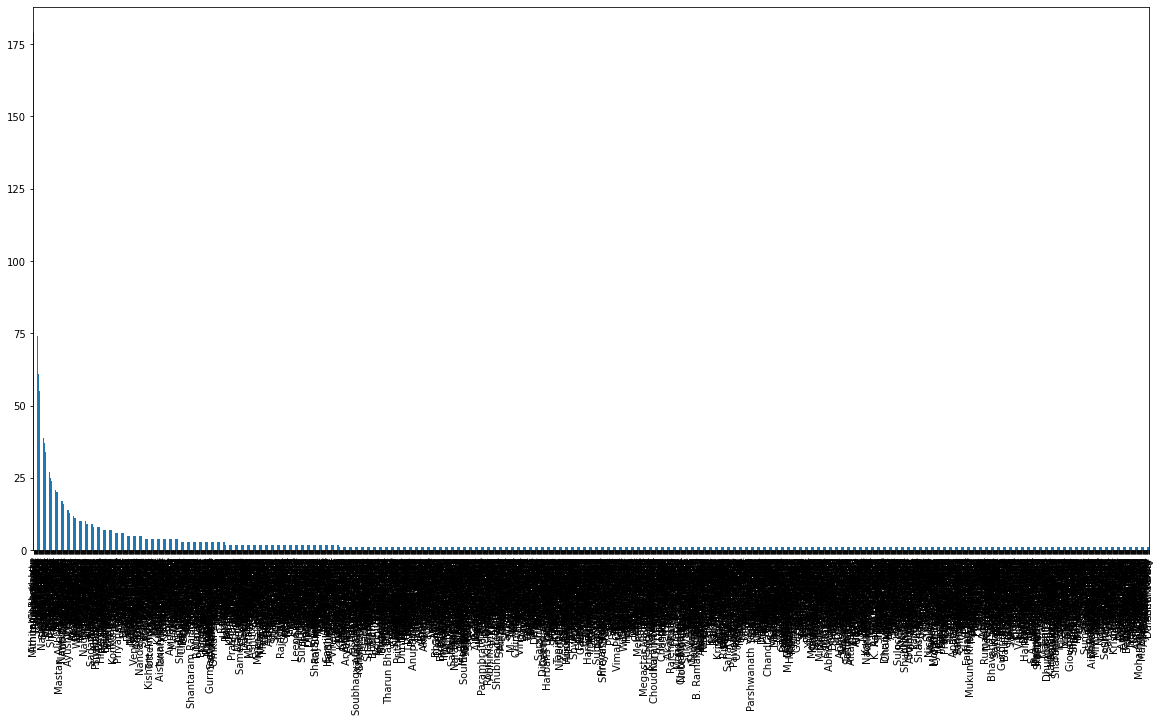

In [298]:
plt.figure(figsize=(20,10))
df['Actor 1'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Director with most Movies')

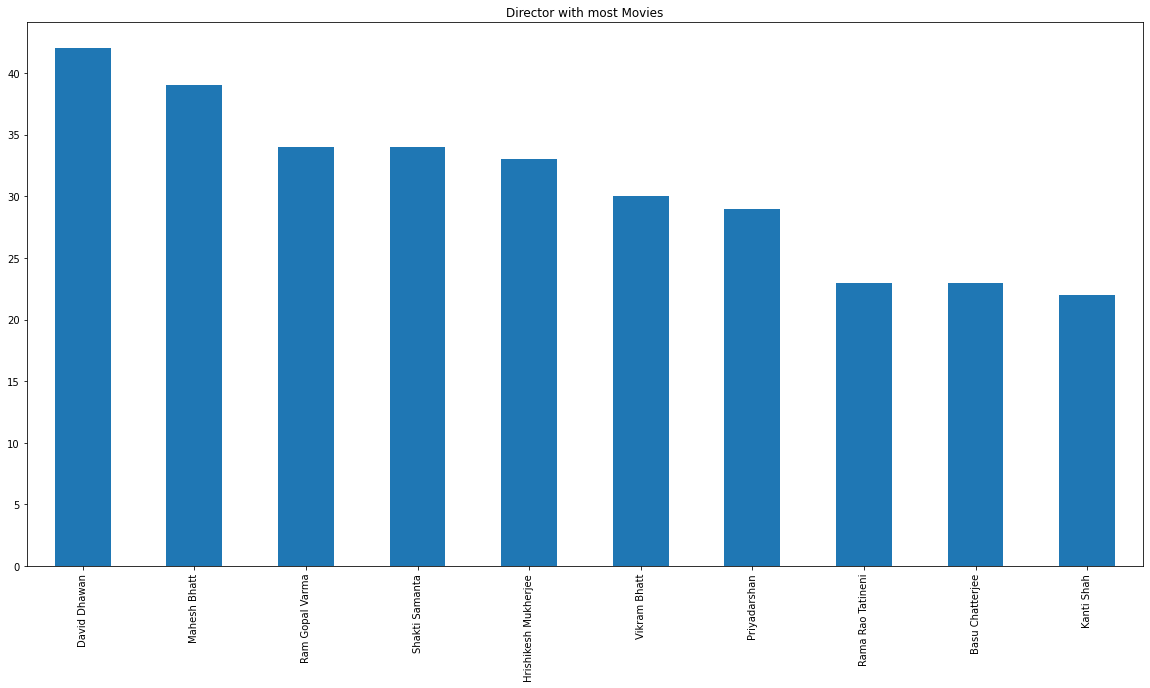

In [313]:
plt.figure(figsize=(20,10))
df['Director'].value_counts().sort_values(ascending = False).head(10).plot(kind='bar')
plt.title('Director with most Movies')

Text(0.5, 1.0, 'Actor with Many Movies')

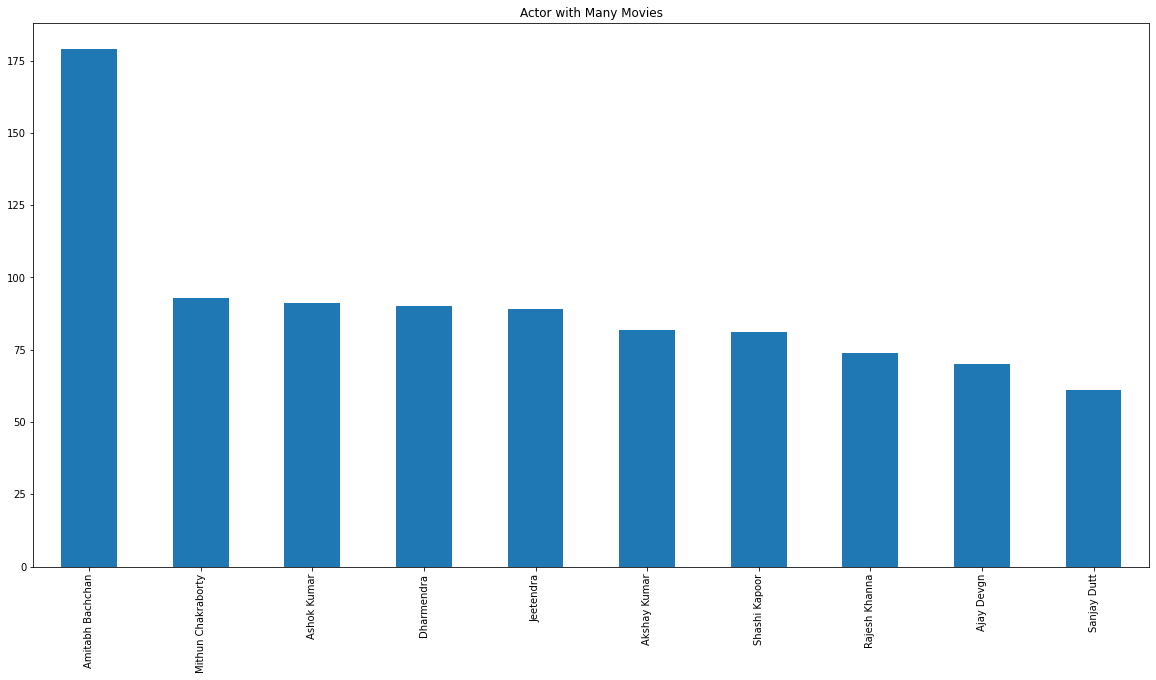

In [314]:
plt.figure(figsize=(20,10))
df['Actor 1'].value_counts().sort_values(ascending = False).head(10).plot(kind='bar')
plt.title('Actor with Many Movies')

<AxesSubplot:>

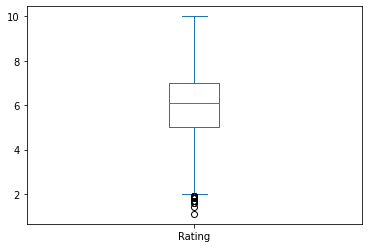

In [320]:
df['Rating'].plot(kind='box')

<AxesSubplot:>

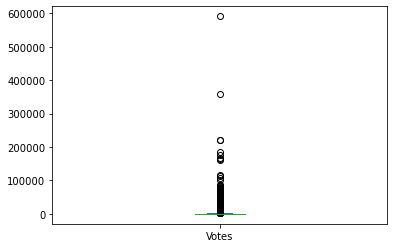

In [321]:
df['Votes'].plot(kind='box')

<AxesSubplot:ylabel='Frequency'>

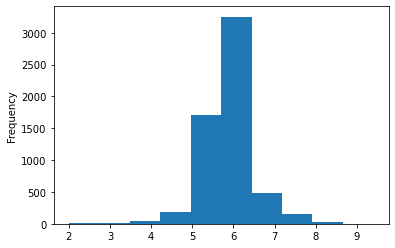

In [325]:
df['Genre_mean_rating'].plot(kind='hist')

In [326]:
df['Genre_mean_rating'].skew()

0.012142516715497383

In [4]:
plt.figure(figsize=(12,8))
sns.heatmap(pd.crosstab(df['Rating'], df['Year'], normalize='columns') * 100)

NameError: name 'df' is not defined

<Figure size 864x576 with 0 Axes>

<AxesSubplot:xlabel='Genre', ylabel='Rating'>

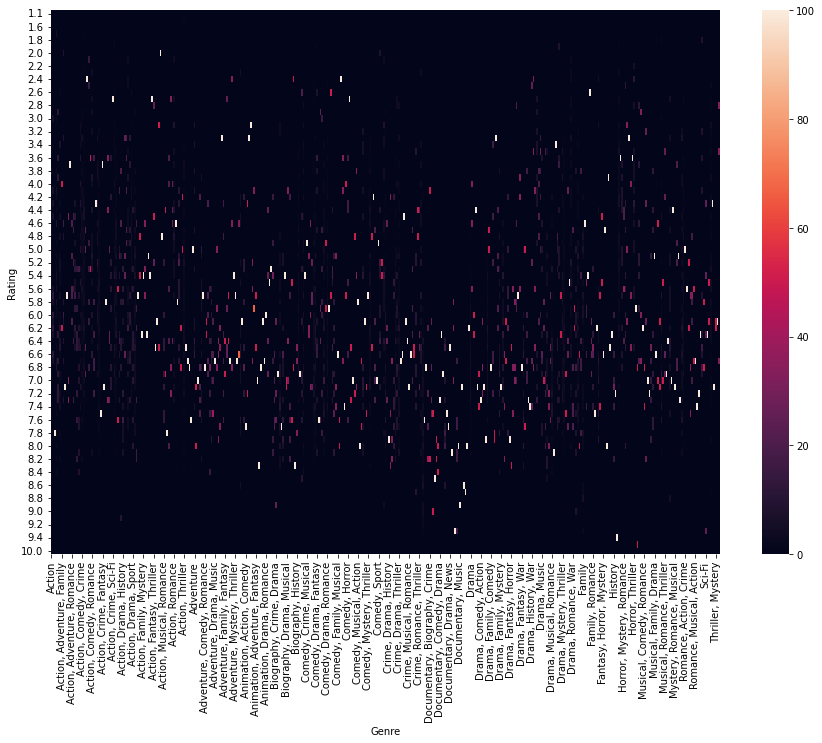

In [336]:
plt.figure(figsize=(15,10))
sns.heatmap(pd.crosstab(df['Rating'], df['Genre'], normalize='columns') * 100)

<AxesSubplot:xlabel='Duration', ylabel='Rating'>

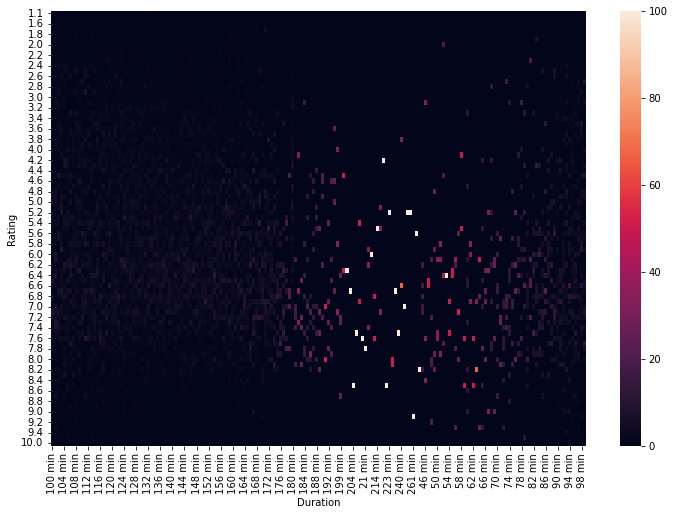

In [6]:
plt.figure(figsize=(12,8))
sns.heatmap(pd.crosstab(df['Rating'], df['Duration'], normalize='columns') * 100)

In [233]:
df['Year'] = df['Year'].astype('int')
df['Duration'] = df['Duration'].astype('int')

In [238]:
df['Votes'] = df['Votes'].str.replace(',','')

In [239]:
df['Votes'] = df['Votes'].astype('int')

In [243]:
df.describe()

,Year,Duration,Rating,Votes
count,5851.000000,5851.000000,5851.000000,5851.000000
mean,1996.416852,132.294480,5.931875,2611.273116
std,19.914640,26.555826,1.389942,13433.828528
min,1931.000000,21.000000,1.100000,5.000000
25%,1983.000000,117.000000,5.000000,28.000000
50%,2002.000000,134.000000,6.100000,119.000000
75%,2013.000000,150.000000,7.000000,862.500000
max,2021.000000,321.000000,10.000000,591417.000000


In [253]:
# Example for encoding 'Genre' based on frequency
genre_counts = df['Genre'].value_counts()
df['Genre_encoded'] = df['Genre'].map(genre_counts)

In [339]:
genre_mean_rating = df.groupby('Genre')['Rating'].transform('mean')
df['Genre_mean_rating'] = genre_mean_rating

In [340]:
director_mean_rating = df.groupby('Director')['Rating'].transform('mean')
df['Director_encoded'] = director_mean_rating

In [341]:
actor_mean_rating = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor_encoded'] = actor_mean_rating

In [274]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Genre_encoded,Genre_mean_rating,Director_encoded
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,901,6.419423,7.000000
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,107,5.716822,4.400000
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,45,6.242222,5.313333
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,5,6.820000,7.383333
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,9,5.477778,5.600000
...,...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,901,6.419423,6.100000
15494,Zubeidaa,2001,153,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,16,6.950000,7.250000
15503,Zulm Ki Zanjeer,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,329,5.743465,6.270000
15505,Zulmi,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,207,5.526087,5.225000


In [343]:
X = df[[ 'Year', 'Votes', 'Duration','Genre_mean_rating','Director_encoded','Actor_encoded']]
y = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 0.7176648127562956


In [144]:
df.shape

(5849, 9)

## Analyze data and provide some trends.
- Year with best rating
- Does length of movie have any impact with the rating?
- Top 10 movies according to rating per year and overall.
- Number of popular movies released each year.
- Counting the number of votes which movies preformed better in rating per year and overall.
- Any other trends or future prediction you may have
- Which director directed the most movies
- Which actor starred in the movie
- Any other trends you can find

## EDA

In [145]:
df[['Year', 'Rating']].sort_values(by='Rating', ascending=False)

,Year,Rating
8339,(2020),10.0
5410,(2021),9.7
5077,(2019),9.4
14222,(2020),9.4
6852,(2021),9.4
...,...,...
11005,(1998),1.7
15040,(2018),1.6
9639,(2015),1.6
3618,(2008),1.4


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5849 entries, 1 to 15508
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            5849 non-null   object 
 1   Year            5849 non-null   object 
 2   Duration        5849 non-null   int32  
 3   Genre           5849 non-null   object 
 4   Rating          5849 non-null   float64
 5   Votes           5849 non-null   int64  
 6   Director        5849 non-null   object 
 7   Actor 1         5849 non-null   object 
 8   Imputed_Genres  5849 non-null   int64  
dtypes: float64(1), int32(1), int64(2), object(5)
memory usage: 434.1+ KB


<AxesSubplot:ylabel='Frequency'>

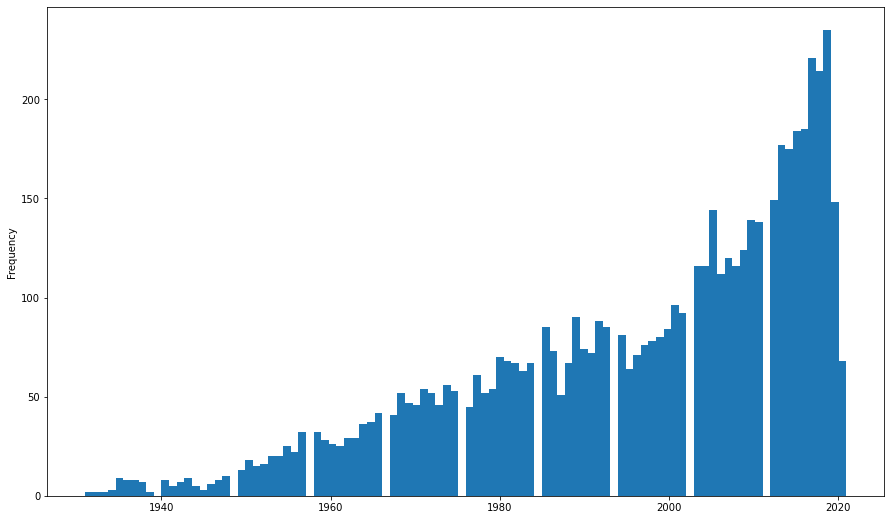

In [342]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,9))
df['Year'].plot(kind='hist', bins=100)

In [ ]:
plt.figure(figsize=(18,12))
df['Year'].value_counts().plot(kind='bar')
plt.title('Number of Movies in Each Year')

In [ ]:
df['Year'].value_counts().skew()

In [ ]:
plt.figure(figsize=(15,9))
df['Rating'].plot(kind='hist', bins=10)

In [ ]:
plt.figure(figsize=(15,9))
df['Rating'].value_counts().plot(kind='bar')

In [ ]:
df.info()

In [ ]:
df['Director']

In [ ]:
df

In [ ]:
missing_values_perc(df)

In [ ]:
df.shape

In [280]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [281]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [282]:
X = df[[ 'Year', 'Votes', 'Duration','Genre_mean_rating','Director_encoded','Actor_encoded']]
y = df['Rating']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print('Mean squared error: ',mean_squared_error(y_test,y_pred))
print('Mean absolute error: ',mean_absolute_error(y_test,y_pred))
print('R2 score: ',r2_score(y_test,y_pred))

Mean squared error:  0.5150427834685288
Mean absolute error:  0.5126362245791549
R2 score:  0.7231721423658712


In [283]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
X = df[[ 'Year', 'Votes', 'Duration','Genre_mean_rating','Director_encoded','Actor_encoded']]
y = df['Rating']
# Assuming X and y are your data and labels
lr = LinearRegression()
scores = cross_val_score(lr, X, y, cv=5)
# print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.73 accuracy with a standard deviation of 0.01
